## 상권분석 - 토지 용도지역별 기본 현황(시군구)
### 1. 데이터 불러오기

In [2]:
#모듈 불러오기
import numpy as np
import pandas as pd #데이터 프레임 다양한 형태로 읽음
import matplotlib.pyplot as plt
import seaborn
plt.style.use('seaborn')#스타일 넣기
import sys
import io
import warnings
#한국어 깨짐
from matplotlib import font_manager, rc
rc('font', family='New Gulim')

In [3]:
#데이터 확인
dang = pd.read_csv("C:/Users/juyeo/Desktop/store/토지 용도지역별 기본현황(시군구).csv")

In [4]:
dang.columns

Index(['(단위: ㎢, 천 필지, 10억원)', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30'],
      dtype='object')

In [5]:
dang = dang.rename(columns={'Unnamed: 1': '면적수 합','Unnamed: 2': '지번수 합','Unnamed: 3': '가액 합','Unnamed: 4': '주거지역 면적','Unnamed: 5': '주거지역 지번수','Unnamed: 6': '주거지역 가액'
                            ,'Unnamed: 7': '상업지역 면적','Unnamed: 8': '상업지역 지번수','Unnamed: 9': '상업지역 가액','Unnamed: 10': '공업지역 면적','Unnamed: 11': '공업지역 지번수','Unnamed: 12': '공업지역 가액'
                            ,'Unnamed: 13': '녹지지역 면적','Unnamed: 14': '녹지지역 지번수','Unnamed: 15': '녹지지역 가액','Unnamed: 16': '기타지역 면적','Unnamed: 17': '기타지역 지번수','Unnamed: 18': '기타지역 가액'})

In [6]:
dang

,"(단위: ㎢, 천 필지, 10억원)",면적수 합,지번수 합,가액 합,주거지역 면적,주거지역 지번수,주거지역 가액,상업지역 면적,상업지역 지번수,상업지역 가액,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,,합 계,NaN,NaN,주거 지역,NaN,NaN,상업 지역,NaN,NaN,...,NaN,자연환경 보호,NaN,NaN,용도미지정,NaN,NaN,기타,NaN,NaN
1,NaN,면적,지번수,가액,면적,지번수,가액,면적,지번수,가액,...,가액,면적,지번수,가액,면적,지번수,가액,면적,지번수,가액
2,전국,"100,401","38,994","5,275,427","2,374","5,028","2,678,732",281,742,"709,953",...,"210,428","6,486",625,"14,235",81,12,"3,559","6,557","6,088",0
3,,605,943,"1,662,762",312,766,"1,196,086",25,62,"324,311",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,38,0
4,서울특별시 종로구,24,49,"70,578",10,32,"31,594",3,13,"37,182",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,경상남도 거창군,803,263,"3,687",5,15,"1,158",0,2,234,...,685,19,3,37,NaN,NaN,NaN,3,16,0
266,경상남도 합천군,984,325,"3,147",3,7,468,0,1,138,...,"1,053",67,2,36,NaN,NaN,NaN,105,84,0
267,,"1,850",862,"88,874",43,89,"19,490",5,14,"6,090",...,308,201,2,530,1,0,47,147,299,0
268,제주특별자치도 제주시,979,513,"54,851",23,56,"14,007",3,9,"4,435",...,139,128,2,420,1,0,47,76,184,0


In [7]:
#결측값 채우기
dang=dang.fillna(0)
#서울 특별시의 땅만 자르기 
seoul_dang=dang.iloc[4:29]

Text(0.5, 1.0, '서울시 구별 총 면적')

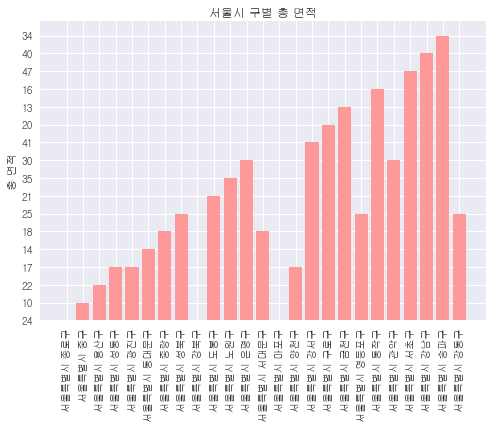

In [8]:
#토지 총면적 시각화
plt.bar(seoul_dang["(단위: ㎢, 천 필지, 10억원)"],seoul_dang["면적수 합"],color='#ff9999')
plt.xticks(rotation=90)
plt.ylabel("총 면적")
plt.title("서울시 구별 총 면적")

Text(0.5, 1.0, '서울시 구별 상업 지역 면적')

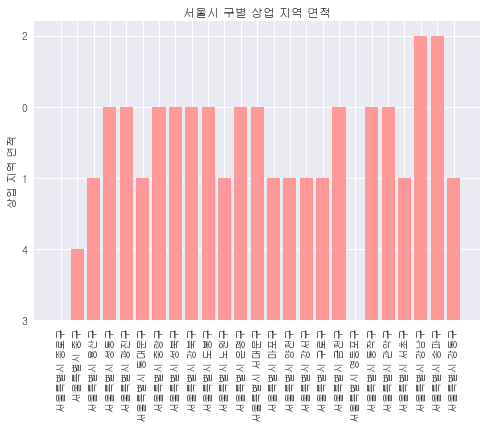

In [9]:
#서울시 주거 상업 지역 면적
plt.bar(seoul_dang["(단위: ㎢, 천 필지, 10억원)"],seoul_dang["상업지역 면적"],color='#ff9999')
plt.xticks(rotation=90)
plt.ylabel("상업 지역 면적")
plt.title("서울시 구별 상업 지역 면적")

In [21]:
gangnam_dang=seoul_dang[seoul_dang["(단위: ㎢, 천 필지, 10억원)"]=='서울특별시 관악구']
gangnam_dang['공업지역 면적']

24    0
Name: 공업지역 면적, dtype: object

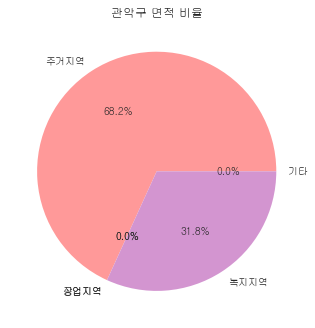

In [22]:
#서울시 관악구 상업 지역 면적 
gangnam_dang=seoul_dang[seoul_dang["(단위: ㎢, 천 필지, 10억원)"]=='서울특별시 관악구']
ratio=[30,0,0,14,0]
labels=['주거지역','상업지역','공업지역','녹지지역','기타']
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','whitesmoke']
plt.pie(ratio, labels=labels, autopct='%.1f%%', colors=colors)
plt.title("관악구 면적 비율")
plt.show()

In [27]:
sucho_dang=seoul_dang[seoul_dang["(단위: ㎢, 천 필지, 10억원)"]=='서울특별시 금천구']
sucho_dang
sucho_dang['기타지역 면적']

21    0
Name: 기타지역 면적, dtype: object

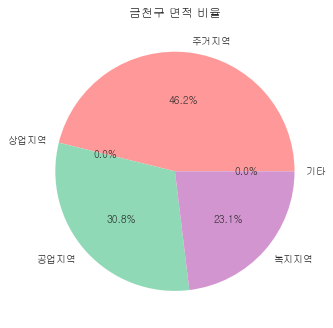

In [28]:
##서울시 서초구 상업 지역 면적

ratio=[6,0,4,3,0]
labels=['주거지역','상업지역','공업지역','녹지지역','기타']
plt.pie(ratio, labels=labels, autopct='%.1f%%',colors=colors)
plt.title("금천구 면적 비율")
plt.show()

In [32]:
#서울시 동작구 상업 지역 비율
songpha_dang=seoul_dang[seoul_dang["(단위: ㎢, 천 필지, 10억원)"]=='서울특별시 동작구']
songpha_dang
songpha_dang['기타지역 면적']

23    0
Name: 기타지역 면적, dtype: object

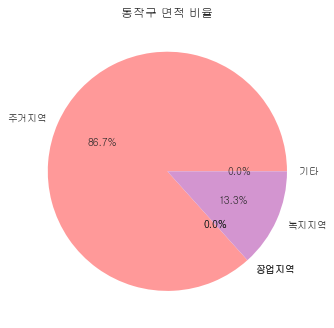

In [33]:
#서울시 동작구 상업 지역 비율
songpha_dang=seoul_dang[seoul_dang["(단위: ㎢, 천 필지, 10억원)"]=='서울특별시 동작구']
ratio=[13,0,0,2,0]
labels=['주거지역','상업지역','공업지역','녹지지역','기타']
plt.pie(ratio, labels=labels, autopct='%.1f%%',colors=colors)
plt.title("동작구 면적 비율")
plt.show()